In [102]:
#created by Bhaskar Yuvaraj
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import load_files
from nltk.corpus import stopwords
import matplotlib as mp
import re
import preprocessor.api as p

In [103]:
#reading the data
ab=pd.read_csv('/Users/bhaskaryuvaraj/Downloads/boston_bombing_tweets.csv')
pd.options.mode.chained_assignment=None

In [217]:
ab.head()

,text,label
0,#Job #Boston Site Supervisor / Lead Carpenter:...,NaN
1,RT @wilw NBC reporting suspect alive and in cu...,1.0
2,#BostonMararthon suspect Dzhokhar Tsarnaev is ...,1.0
3,THANK YOU ?MT @Boston_Police: CAPTURED! The hu...,NaN
4,RT @CNBCClosingBell The Boston College Center ...,NaN


In [105]:
#splitting training data from the entire data
train_data=ab[(ab['label']==1) | (ab['label']==0)]

In [375]:
#splittting test data from the entire data
test_data=ab[(ab['label']!=1) & (ab['label']!=0)]

In [228]:
print(test_data) #just verifying the splitting

                                                    text  label
0      #Job #Boston Site Supervisor / Lead Carpenter:...    NaN
3      THANK YOU ?MT @Boston_Police: CAPTURED! The hu...    NaN
4      RT @CNBCClosingBell The Boston College Center ...    NaN
5      Diversity: BU President To Testify Before The ...    NaN
7      @Kid_Ink \nNEW MUSIC @DubbZeroBFMI ft @TroyAve...    NaN
...                                                  ...    ...
16211  @MzSexxyJas We could be looking at 3 feet of s...    NaN
16213  "@MsStacyThatsMe: @4evergraceJONES Lol We're C...    NaN
16214  RT @BostonDotCom This is according to @AP : Su...    NaN
16216  Thanks RT @laVisualiza: Boston is truly a beau...    NaN
16217  @chelseahandler, you're a class act. #PrayForB...    NaN

[12218 rows x 2 columns]


In [110]:
#now consider only training data for training of the model
train_data.columns

Index(['text', 'label'], dtype='object')

In [111]:
train_data.shape

(4000, 2)

In [112]:
#checking if there is any missing values in the data
train_data.isnull().sum()

text     0
label    0
dtype: int64

In [113]:
#to remove the unwanted characters.

In [220]:
def text_cleaning(df,column):
    df[column]=df[column].apply(lambda x:p.clean(x))
    df[column]= df[column].apply(lambda x:re.sub(r':','',x))
    df[column]= df[column].apply(lambda x:re.sub(r"(@[A-Za-z0-9]+) | ([^0-9A-Za-z\t]) | (\w+:\/\/\S+)|^rt|http.+?","",x))
    df[column]=df[column].str.lower()
    
    return df

In [221]:
train_data=text_cleaning(train_data,'text')

In [218]:
train_data.head() # verifying

,text,label
1,nbc reporting suspect alive custody. cnn repor...,1.0
2,suspect dzhokhar tsarnaev custody,1.0
6,margaret thatcher remembered america midst ter...,1.0
15,spontaneous celebrations streets ofthis yr old...,1.0
25,looking someone dishwasher install (charlestow...,0.0


In [222]:
#removing stop words
def get_text(text):
    sw_nltk = stopwords.words('english')
    words = [word for word in text.split() if word.lower() not in sw_nltk]
    new_text = " ".join(words)
    
    return new_text


train_data['text']=train_data['text'].apply(lambda x:get_text(x))

In [118]:
train_data.dtypes

text      object
label    float64
dtype: object

In [119]:
print(train_data['text'])

1        nbc reporting suspect alive custody. cnn repor...
2                        suspect dzhokhar tsarnaev custody
6        margaret thatcher remembered america midst ter...
15       spontaneous celebrations streets ofthis yr old...
25       looking someone dishwasher install (charlestow...
                               ...                        
16199      crowds cheering tactical teams coming franklin.
16201    aero-ma-bu-14020 information assurance enginee...
16210    big football match today, boston store vs bost...
16212    updated photo year-old dzhokhar tsarnaev relea...
16215    cbs fbi leaning toward attack domestic terrori...
Name: text, Length: 4000, dtype: object


In [120]:
#checking for count of each label

In [121]:
train_data.groupby('label')['label'].count()

label
0.0    2000
1.0    2000
Name: label, dtype: int64

In [ ]:
#since we have equal amount of data for both '0' and '1', upsampling or downsampling is not required.

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [215]:
#applying SGD algorithm
pipeline_sgd = Pipeline([
    ('counter_vect', CountVectorizer()),
    ('tfidf_trans',  TfidfTransformer()),
    ('nb', SGDClassifier()),
])

In [272]:
#now splitting the data to training and testing set
x_train,x_test,y_train,y_test=train_test_split(train_data['text'],train_data['label'],test_size=0.3,random_state=42)


In [273]:
#adding the training data to the model
model=pipeline_sgd.fit(x_train,y_train)

In [274]:
y_predict=model.predict(x_test)

In [275]:
from sklearn.metrics import f1_score

In [276]:
f1_score(y_test,y_predict)

0.8830950378469302

In [197]:
confusion_matrix(y_test,y_predict)

array([[1089,  128],
       [ 171, 1012]])

In [376]:
#now predicting the test_data labels
test_data = text_cleaning(test_data,'text')

In [377]:
test_data['label']=model.predict(test_data['text'])

In [378]:
test_data.head()

,text,label
0,"site supervisorlead carpenter ma-boston, we ar...",0.0
3,thank you ?mt captured! the hunt is over. the...,1.0
4,the boston college center on wealthphilanthrop...,0.0
5,diversity bu president to testify before the b...,0.0
7,new music ft produced by,0.0


In [354]:
test_data.reset_index(drop=True, inplace=True)

In [329]:
#exporting test data to csv
predicted_test_data=test_data.to_csv('/Users/bhaskaryuvaraj/Downloads/final_predicted_data')

In [30]:
#applying bert model to check
from transformers import *
from transformers import BertTokenizer, TFBertModel, BertConfig
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [39]:
#applying BERT model algorithm
num_classes=len(train_data['text'].unique())
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=num_classes)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertForSequenceClassification: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['dropout_75', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [42]:
input_ids=[]
attention_masks=[]

for sent in train_data['text']:
    bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =64,pad_to_max_length = True,return_attention_mask = True)
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(train_data['label'])

In [43]:
len(input_ids)
len(attention_masks)
len(labels)


(4000, 4000, 4000)

In [49]:
#training and testing the train_data and splitting it
train_inp,val_inp,train_label,val_label,train_mask,val_mask=train_test_split(input_ids,labels,attention_masks,test_size=0.2)

In [48]:
# applying the loss and optimizer fuction to the model
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric=tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5,epsilon=1e-08)

bert_model.compile(loss=loss,optimizer=optimizer,metrics=[metric])

In [53]:
history=bert_model.fit([train_inp,train_mask],train_label,batch_size=300,epochs=6)


Epoch 1/6
11/11 [==============================] - 2863s 254s/step - loss: 6.7123 - accuracy: 0.5300
Epoch 2/6
11/11 [==============================] - 2163s 191s/step - loss: 5.8050 - accuracy: 0.5609
Epoch 3/6
11/11 [==============================] - 2733s 244s/step - loss: 4.9599 - accuracy: 0.5600
Epoch 4/6
11/11 [==============================] - 1880s 171s/step - loss: 4.1910 - accuracy: 0.5894
Epoch 5/6
11/11 [==============================] - 1912s 172s/step - loss: 3.4808 - accuracy: 0.6313
Epoch 6/6
11/11 [==============================] - 2184s 199s/step - loss: 2.8254 - accuracy: 0.7328


In [198]:
#predicting the test labels
pred_label=bert_model.predict([val_inp,val_mask],batch_size=300)

In [205]:
len(pred_label[0]),len(val_label),len(val_mask)

(800, 800, 800)

In [207]:
pred_labels = pred_label[0].argmax(axis=1)

In [209]:
f1 = f1_score(val_label,pred_labels)

In [210]:
print(f1)

0.7832585949177877


In [330]:
# just a small analysis of results of predicted data
print(test_data)

                                                    text  label
0      site supervisorlead carpenter ma-boston, we ar...    0.0
1      thank you ?mt  captured! the hunt is over. the...    1.0
2      the boston college center on wealthphilanthrop...    0.0
3      diversity bu president to testify before the b...    0.0
4                               new music ft produced by    0.0
...                                                  ...    ...
12213  we could be looking at feet of snow. they will...    0.0
12214         " lol we're criminals" yes...not terrorist    1.0
12215  this is according to  suspects are brothers fr...    1.0
12216        thanks rt  boston is truly a beautiful city    1.0
12217                              , you're a class act.    1.0

[12218 rows x 2 columns]


In [379]:
by=test_data


In [381]:
by['label']=by['label'].replace([0,1],['not flagged','flagged'])

In [382]:
by.head()

,text,label
0,"site supervisorlead carpenter ma-boston, we ar...",not flagged
3,thank you ?mt captured! the hunt is over. the...,flagged
4,the boston college center on wealthphilanthrop...,not flagged
5,diversity bu president to testify before the b...,not flagged
7,new music ft produced by,not flagged


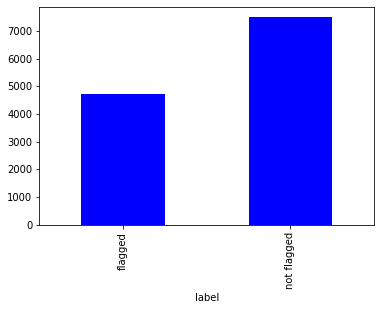

In [384]:
by.groupby('label')['label'].count().plot(kind='bar',color='blue')

from above graph it is seen that non-flagged tweets are more than flagged tweets in the test data.